# Comparison of various Classification algorithms

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    precision_recall_curve, f1_score
)

## Custom functions to evaluate models

In [2]:
# Define all the funcs to later evaluate models
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    plt.matshow(cm, cmap="coolwarm", alpha=0.7)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center')
    plt.title(title)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()


def plot_precision_recall(y_true, y_probs, model_name="Model"):
    precision, recall, thresholds = precision_recall_curve(y_true, y_probs)
    f1 = f1_score(y_true, (y_probs >= 0.5).astype(int))
    plt.figure()
    plt.plot(recall, precision,
             label=f"Precision-Recall Curve (F1 = {f1:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"{model_name} Precision-Recall Curve")
    plt.legend()
    plt.show()


def plot_roc_curve(y_true, y_probs, model_name="Model"):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"{model_name} ROC Curve")
    plt.legend()
    plt.show()


df = pd.read_csv("test2.csv")
df.head(5)

,Version,Error Correction Level,Number of Blocks,Expected number of data codewords,Actual number of data codewords,Number of empty bytes,Number of EC Codewords,Errors corrected
0,2,L,1,34,34,0,10,0
1,10,L,4,274,274,0,18,0
2,1,L,1,19,19,0,7,0
3,3,M,1,44,44,0,26,0
4,2,M,1,28,27,1,16,8


## Dataframe preparation
This is just demonstration, this should be done while generating the csv, and based of the origin of the qr code (i.e. (malicious dataset) -> modified)

In [3]:
df['Modified'] = df['Number of empty bytes'].apply(lambda x: 1 if x > 0 else 0)
df['EC Level'] = df['Error Correction Level'].map(
    {'L': 1, 'M': 2, 'Q': 3, 'H': 4}).astype(int)

df.head(10)

,Version,Error Correction Level,Number of Blocks,Expected number of data codewords,Actual number of data codewords,Number of empty bytes,Number of EC Codewords,Errors corrected,Modified,EC Level
0,2,L,1,34,34,0,10,0,0,1
1,10,L,4,274,274,0,18,0,0,1
2,1,L,1,19,19,0,7,0,0,1
3,3,M,1,44,44,0,26,0,0,2
4,2,M,1,28,27,1,16,8,1,2
5,5,L,1,108,108,0,26,0,0,1
6,2,L,1,34,28,6,10,5,1,1


In [4]:
train_X = df[['Number of empty bytes', 'Errors corrected']]
train_X.head(10)

,Number of empty bytes,Errors corrected
0,0,0
1,0,0
2,0,0
3,0,0
4,1,8
5,0,0
6,6,5


In [5]:
train_y = df['Modified']
train_y.head(10)

0    0
1    0
2    0
3    0
4    1
5    0
6    1
Name: Modified, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(train_X,
                                                    train_y, test_size=0.3,
                                                    random_state=1)

X_train.head(10)

# print("Test set size: " + str(X_test.size))
# print("Train set size: " + str(X_train.size))

,Number of empty bytes,Errors corrected
0,0,0
4,1,8
3,0,0
5,0,0


## Decison Tree

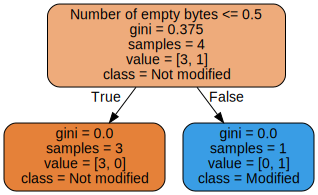

In [7]:
dtc = tree.DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=2)
# Using gini as criterion
dtc_gini = tree.DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=2)

clf = dtc.fit(X_train, y_train)
clf2 = dtc_gini.fit(X_train, y_train)

feature_names = X_train.columns
class_names = ['Not modified', 'Modified']

export_graphviz(
    clf,
    out_file="test.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    filled=True,
)

# Also export DT with gini as criterion
export_graphviz(
    dtc_gini,
    out_file="test_gini.dot",
    feature_names=feature_names,
    class_names=class_names,
    rounded=True,
    filled=True,
)

dtc_pred = clf.predict(X_test)
dtc_gini_pred = clf2.predict(X_test)

Source.from_file("test_gini.dot")
#Source.from_file("test.dot")

## Decision Tree evaluation

<Figure size 640x480 with 0 Axes>

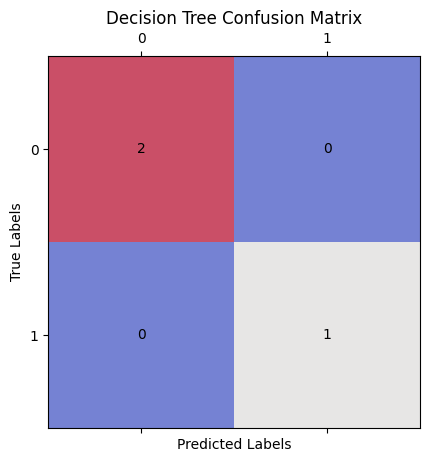

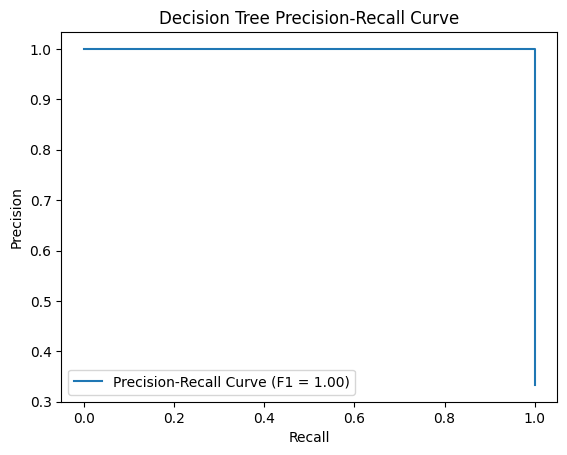

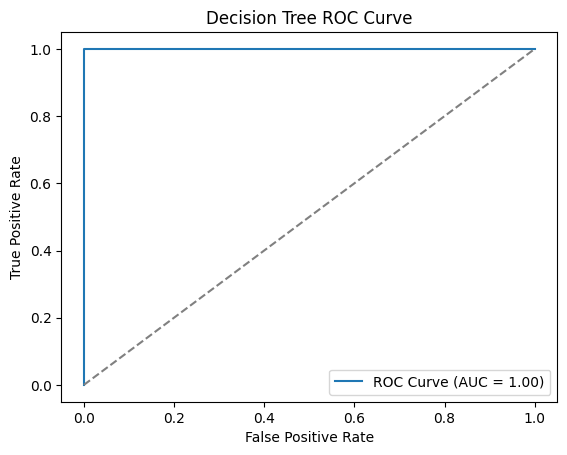

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [8]:
plot_confusion_matrix(y_test, dtc_pred, title="Decision Tree Confusion Matrix")
plot_precision_recall(y_test, dtc_pred, model_name="Decision Tree")
plot_roc_curve(y_test, dtc_pred, model_name="Decision Tree")
print(classification_report(y_test, dtc_pred))

## Random Forest

<Figure size 640x480 with 0 Axes>

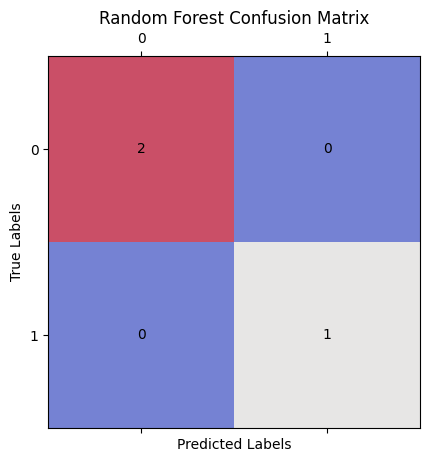

In [ ]:
rf = RFC(random_state=1234, criterion="entropy", n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

plot_confusion_matrix(y_test, dtc_pred, title="Random Forest Confusion Matrix")
plot_precision_recall(y_test, dtc_pred, model_name="Random Forest")
plot_roc_curve(y_test, dtc_pred, model_name="Random Forest")
print(classification_report(y_test, dtc_pred))